In [28]:
import pandas as pd

df = pd.read_excel('data/dataset.xlsx')
print(df.head())

         Date Student  Study Hours  Sleep (hrs)  Exercise (mins)  \
0  01/06/2024    Asha            4            6               30   
1  01/06/2024    Ravi            3            7               20   
2  01/06/2024    Tina            1            8               10   
3  01/06/2024    Mike            2            6               20   
4  01/06/2024    Sara            1            6               25   

   Social Score  Screen Time (hrs)  Mood  Stress  Academic Score         Notes  
0             5                  3     6       6              83    Low energy  
1             2                  8     4       7              74  Felt anxious  
2             5                  3    10       2              71           NaN  
3             2                  6     8       2              77           NaN  
4             4                  7     8       3              76    Good focus  


In [29]:
print(df.info())         # Data types, missing values, column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               150 non-null    object
 1   Student            150 non-null    object
 2   Study Hours        150 non-null    int64 
 3   Sleep (hrs)        150 non-null    int64 
 4   Exercise (mins)    150 non-null    int64 
 5   Social Score       150 non-null    int64 
 6   Screen Time (hrs)  150 non-null    int64 
 7   Mood               150 non-null    int64 
 8   Stress             150 non-null    int64 
 9   Academic Score     150 non-null    int64 
 10  Notes              120 non-null    object
dtypes: int64(8), object(3)
memory usage: 13.0+ KB
None


In [30]:
print(df.describe()) 


       Study Hours  Sleep (hrs)  Exercise (mins)  Social Score  \
count   150.000000   150.000000       150.000000    150.000000   
mean      2.846667     6.993333        17.000000      3.133333   
std       1.379313     1.426013         9.796589      1.445505   
min       1.000000     5.000000         0.000000      1.000000   
25%       2.000000     6.000000        10.000000      2.000000   
50%       3.000000     7.000000        20.000000      3.000000   
75%       4.000000     8.000000        25.000000      4.000000   
max       5.000000     9.000000        30.000000      5.000000   

       Screen Time (hrs)        Mood      Stress  Academic Score  
count         150.000000  150.000000  150.000000      150.000000  
mean            5.580000    7.000000    4.140000       76.833333  
std             1.810743    2.158175    1.996742        6.115682  
min             3.000000    2.000000    2.000000       64.000000  
25%             4.000000    6.000000    2.000000       72.000000  
50%

In [31]:
print(df.isnull().sum())

Date                  0
Student               0
Study Hours           0
Sleep (hrs)           0
Exercise (mins)       0
Social Score          0
Screen Time (hrs)     0
Mood                  0
Stress                0
Academic Score        0
Notes                30
dtype: int64


In [32]:
#Lets explore asha's record
asha_df = df[df['Student'] == 'Asha']
print(asha_df.head())

# Days with high stress
high_stress_df = df[df['Stress'] >= 7]

          Date Student  Study Hours  Sleep (hrs)  Exercise (mins)  \
0   01/06/2024    Asha            4            6               30   
5   02/06/2024    Asha            4            5               15   
10  03/06/2024    Asha            2            8               10   
15  04/06/2024    Asha            2            7               10   
20  05/06/2024    Asha            3            8               30   

    Social Score  Screen Time (hrs)  Mood  Stress  Academic Score  \
0              5                  3     6       6              83   
5              2                  4     6       5              72   
10             5                  5     7       4              71   
15             5                  6    10       2              70   
20             2                  7     8       3              81   

           Notes  
0     Low energy  
5     Good focus  
10    Good focus  
15  Felt anxious  
20           NaN  


In [33]:
grouped = df.groupby('Student').agg({'Mood': 'mean', 'Stress': 'mean'})
print(grouped)


             Mood    Stress
Student                    
Asha     6.966667  4.166667
Mike     6.766667  4.233333
Ravi     7.133333  4.100000
Sara     7.000000  4.066667
Tina     7.133333  4.133333


In [34]:
df.select_dtypes(include='number').corr()

,Study Hours,Sleep (hrs),Exercise (mins),Social Score,Screen Time (hrs),Mood,Stress,Academic Score
Study Hours,1.000000,0.006301,0.057615,-0.026705,0.086903,-0.056364,0.102884,0.712213
Sleep (hrs),0.006301,1.000000,0.176312,0.049273,-0.019286,0.030530,-0.004384,0.149937
Exercise (mins),0.057615,0.176312,1.000000,0.021327,0.178198,-0.238075,0.230904,0.132183
Social Score,-0.026705,0.049273,0.021327,1.000000,0.011282,0.352818,-0.339023,0.000253
Screen Time (hrs),0.086903,-0.019286,0.178198,0.011282,1.000000,-0.166587,0.170440,-0.013636
Mood,-0.056364,0.030530,-0.238075,0.352818,-0.166587,1.000000,-0.932893,0.041188
Stress,0.102884,-0.004384,0.230904,-0.339023,0.170440,-0.932893,1.000000,0.011267
Academic Score,0.712213,0.149937,0.132183,0.000253,-0.013636,0.041188,0.011267,1.000000


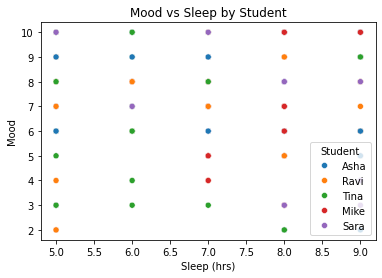

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='Sleep (hrs)', y='Mood', hue='Student')
plt.title('Mood vs Sleep by Student')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

def regression_analysis(df, features, target):
    """
    Fits a linear regression model and prints evaluation metrics and feature importances.
    
    Args:
        df: DataFrame with your data
        features: list of column names to use as predictors
        target: string, the column to predict
    """
    X = df[features]
    y = df[target]
    
    # Handle missing values
    X = X.fillna(X.mean())
    y = y.fillna(y.mean())
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=42)
    # Fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Feature importance (coefficients)
    importance = pd.Series(model.coef_, index=features)
    
    # Print results
    print(f"Results for predicting {target}:")
    print(f"R2 Score: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print("\nFeature importances (effect on prediction):")
    print(importance.sort_values(ascending=False))
    print("-" * 40)
    
    return model, importance, y_test, y_pred

# Example usage for Mood:
features_reg = ['Sleep (hrs)', 'Study Hours', 'Stress', 'Exercise (mins)', 'Screen Time (hrs)', 'Social Score']
features_clf = ['Sleep (hrs)', 'Study Hours', 'Exercise (mins)', 'Screen Time (hrs)', 'Social Score', 'Mood']


mood_model, importance, y_test, y_pred = regression_analysis(df, features_reg, 'Mood')

# Example usage for Academic Score:
academic_model, importance, y_test, y_pred = regression_analysis(df, features_reg, 'Academic Score')


Results for predicting Mood:
R2 Score: 0.868
RMSE: 0.824

Feature importances (effect on prediction):
Sleep (hrs)          0.058492
Social Score         0.055681
Study Hours          0.050077
Screen Time (hrs)    0.015102
Exercise (mins)     -0.007887
Stress              -1.004148
dtype: float64
----------------------------------------
Results for predicting Academic Score:
R2 Score: 0.639
RMSE: 4.202

Feature importances (effect on prediction):
Study Hours          3.024389
Sleep (hrs)          0.595487
Exercise (mins)      0.052765
Social Score        -0.096717
Stress              -0.114289
Screen Time (hrs)   -0.316670
dtype: float64
----------------------------------------


In [38]:
import matplotlib.pyplot as plt

def plot_predictions(y_test, y_pred, title="Actual vs Predicted"):
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title(title)
    plt.show()


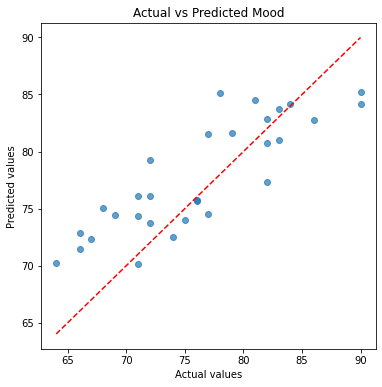

In [15]:
# After y_pred = model.predict(X_test)
plot_predictions(y_test, y_pred, title="Actual vs Predicted Mood")


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Add a column: High Stress Day (1 if Stress >= 7, else 0)
df['HighStress'] = (df['Stress'] >= 7).astype(int)
X = df[features_clf]
y = df['HighStress']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit classifier
stress_model = LogisticRegression()
stress_model.fit(X_train, y_train)
y_pred = stress_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9333333333333333
Confusion Matrix:
 [[24  0]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.96      0.83      0.88        30
weighted avg       0.94      0.93      0.93        30



In [40]:
importance = pd.Series(stress_model.coef_[0], index=features_clf)
print("Feature importance (positive: increases high stress risk):")
print(importance.sort_values(ascending=False))


Feature importance (positive: increases high stress risk):
Study Hours          0.704498
Exercise (mins)      0.005058
Screen Time (hrs)   -0.101397
Social Score        -0.185977
Sleep (hrs)         -0.215006
Mood                -2.318610
dtype: float64


In [41]:
import os
os.makedirs('models', exist_ok=True)

In [42]:
import pickle

with open('models/mood_regressor.pkl', 'wb') as f:
    pickle.dump(mood_model, f)

with open('models/academic_regressor.pkl', 'wb') as f:
    pickle.dump(academic_model, f)

with open('models/stress_classifier.pkl', 'wb') as f:
    pickle.dump(stress_model, f)

In [22]:
# Example: predict Mood for new data
sample = pd.DataFrame([[7, 4, 6, 20, 5, 3]], columns=features_reg)
predicted_mood = mood_model.predict(sample)
print(predicted_mood)

[5.11639811]
